# AAA Project : FC 24

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## DATA

In [3]:
df = pd.read_csv('all_players.csv')

In [4]:
df.head()

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17326 non-null  int64  
 1   Name            17326 non-null  object 
 2   Nation          17326 non-null  object 
 3   Club            17326 non-null  object 
 4   Position        17326 non-null  object 
 5   Age             17326 non-null  int64  
 6   Overall         17326 non-null  int64  
 7   Pace            17326 non-null  int64  
 8   Shooting        17326 non-null  int64  
 9   Passing         17326 non-null  int64  
 10  Dribbling       17326 non-null  int64  
 11  Defending       17326 non-null  int64  
 12  Physicality     17326 non-null  int64  
 13  Acceleration    17326 non-null  int64  
 14  Sprint          17326 non-null  int64  
 15  Positioning     17326 non-null  int64  
 16  Finishing       17326 non-null  int64  
 17  Shot            17326 non-null 

In [17]:
df.describe()

,Unnamed: 0,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,Sprint,Positioning,Finishing,Shot,Long,Volleys,Penalties,Vision,Crossing,Free,Curve,Agility,Balance,Reactions,Ball,Composure,Interceptions,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves,GK
count,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,1952.000000
mean,7308.093617,25.781658,66.980723,68.286448,54.803763,59.261284,56.852822,51.510216,65.663858,64.844049,65.043634,51.446612,47.311209,60.413829,54.804687,43.110643,48.308727,55.263996,50.179441,43.618262,48.712455,63.953480,64.288410,63.038843,59.830197,59.111624,48.191100,52.604006,47.898361,49.738255,47.244661,66.759206,63.733176,65.608623,56.614799,2.949786,2.419081,66.867316
std,4814.849700,4.655255,6.981987,10.657137,13.872357,9.776640,19.041291,16.439490,9.485501,15.319163,15.111650,20.227817,20.118041,14.710471,14.810068,17.974208,15.873827,13.762405,18.195750,17.233759,18.245501,15.002496,14.537344,9.033038,17.075996,12.324703,21.002475,17.718303,20.692083,21.309042,20.771639,11.687863,16.440153,12.496360,16.892850,0.679713,0.794500,8.010265
min,0.000000,17.000000,47.000000,27.000000,19.000000,25.000000,5.000000,15.000000,29.000000,14.000000,15.000000,3.000000,3.000000,10.000000,10.000000,4.000000,8.000000,10.000000,7.000000,5.000000,7.000000,20.000000,20.000000,30.000000,9.000000,13.000000,4.000000,5.000000,4.000000,8.000000,7.000000,27.000000,15.000000,22.000000,11.000000,1.000000,1.000000,46.000000
25%,2850.250000,22.000000,63.000000,62.000000,45.000000,53.000000,52.000000,37.000000,60.000000,57.000000,58.000000,41.000000,32.000000,56.000000,47.000000,31.000000,39.000000,46.000000,40.000000,32.000000,37.000000,56.000000,56.000000,57.000000,56.000000,52.000000,28.000000,45.000000,31.000000,30.000000,28.000000,59.000000,57.000000,58.000000,46.000000,3.000000,2.000000,61.000000
50%,7181.500000,25.000000,67.000000,69.000000,57.000000,60.000000,62.000000,55.000000,67.000000,68.000000,68.000000,57.000000,52.000000,64.000000,58.000000,44.000000,49.000000,57.000000,54.000000,43.000000,51.000000,66.000000,67.000000,63.000000,64.000000,60.000000,55.000000,56.000000,54.000000,58.000000,54.000000,68.000000,67.000000,67.000000,60.000000,3.000000,2.000000,67.000000
75%,11512.750000,29.000000,71.000000,76.000000,65.000000,66.000000,69.000000,65.000000,73.000000,75.000000,75.000000,66.000000,63.000000,70.000000,65.000000,57.000000,60.000000,65.000000,64.000000,57.000000,62.000000,75.000000,75.000000,69.000000,70.000000,68.000000,65.000000,65.000000,65.000000,67.000000,64.000000,75.000000,75.000000,74.000000,69.000000,3.000000,3.000000,72.000000
max,15844.000000,43.000000,91.000000,97.000000,93.000000,94.000000,96.000000,91.000000,90.000000,97.000000,97.000000,96.000000,96.000000,94.000000,94.000000,92.000000,92.000000,95.000000,95.000000,94.000000,93.000000,95.000000,95.000000,94.000000,94.000000,96.000000,90.000000,94.000000,92.000000,92.000000,90.000000,95.000000,95.000000,96.000000,95.000000,5.000000,5.000000,93.000000


In [12]:
df['Nation'].nunique() #nb de nations

155

In [13]:
df['Club'].nunique() #nb de club

676

In [16]:
#Ce code nous permet de voir quelles sont les différentes catégories des features de type objet
#On ne s'intéresse pas au nom ni à l'URL qui sont uniques pour chaque joueur
#Nous n'affichons pas la nation et le club car beaucoup trop nombreux et ce serait illisible, mais ce sont surement des features intéressantes

colonnes_exclues = ['Name', 'Nation', 'URL', 'Club']
data_object = df.select_dtypes('object')

for col in data_object.columns.difference(colonnes_exclues):
  print(f'{col.ljust(30, "-")} {df[col].unique()}')

Att work rate----------------- ['High' 'Low' 'Medium']
Def work rate----------------- ['Low' 'Medium' 'High']
Gender------------------------ ['M' 'F']
Position---------------------- ['ST' 'CM' 'CF' 'GK' 'RW' 'CB' 'LW' 'CDM' 'CAM' 'RM' 'LB' 'RB' 'LM' 'LWB'
 'RWB']
Preferred foot---------------- ['Right' 'Left']


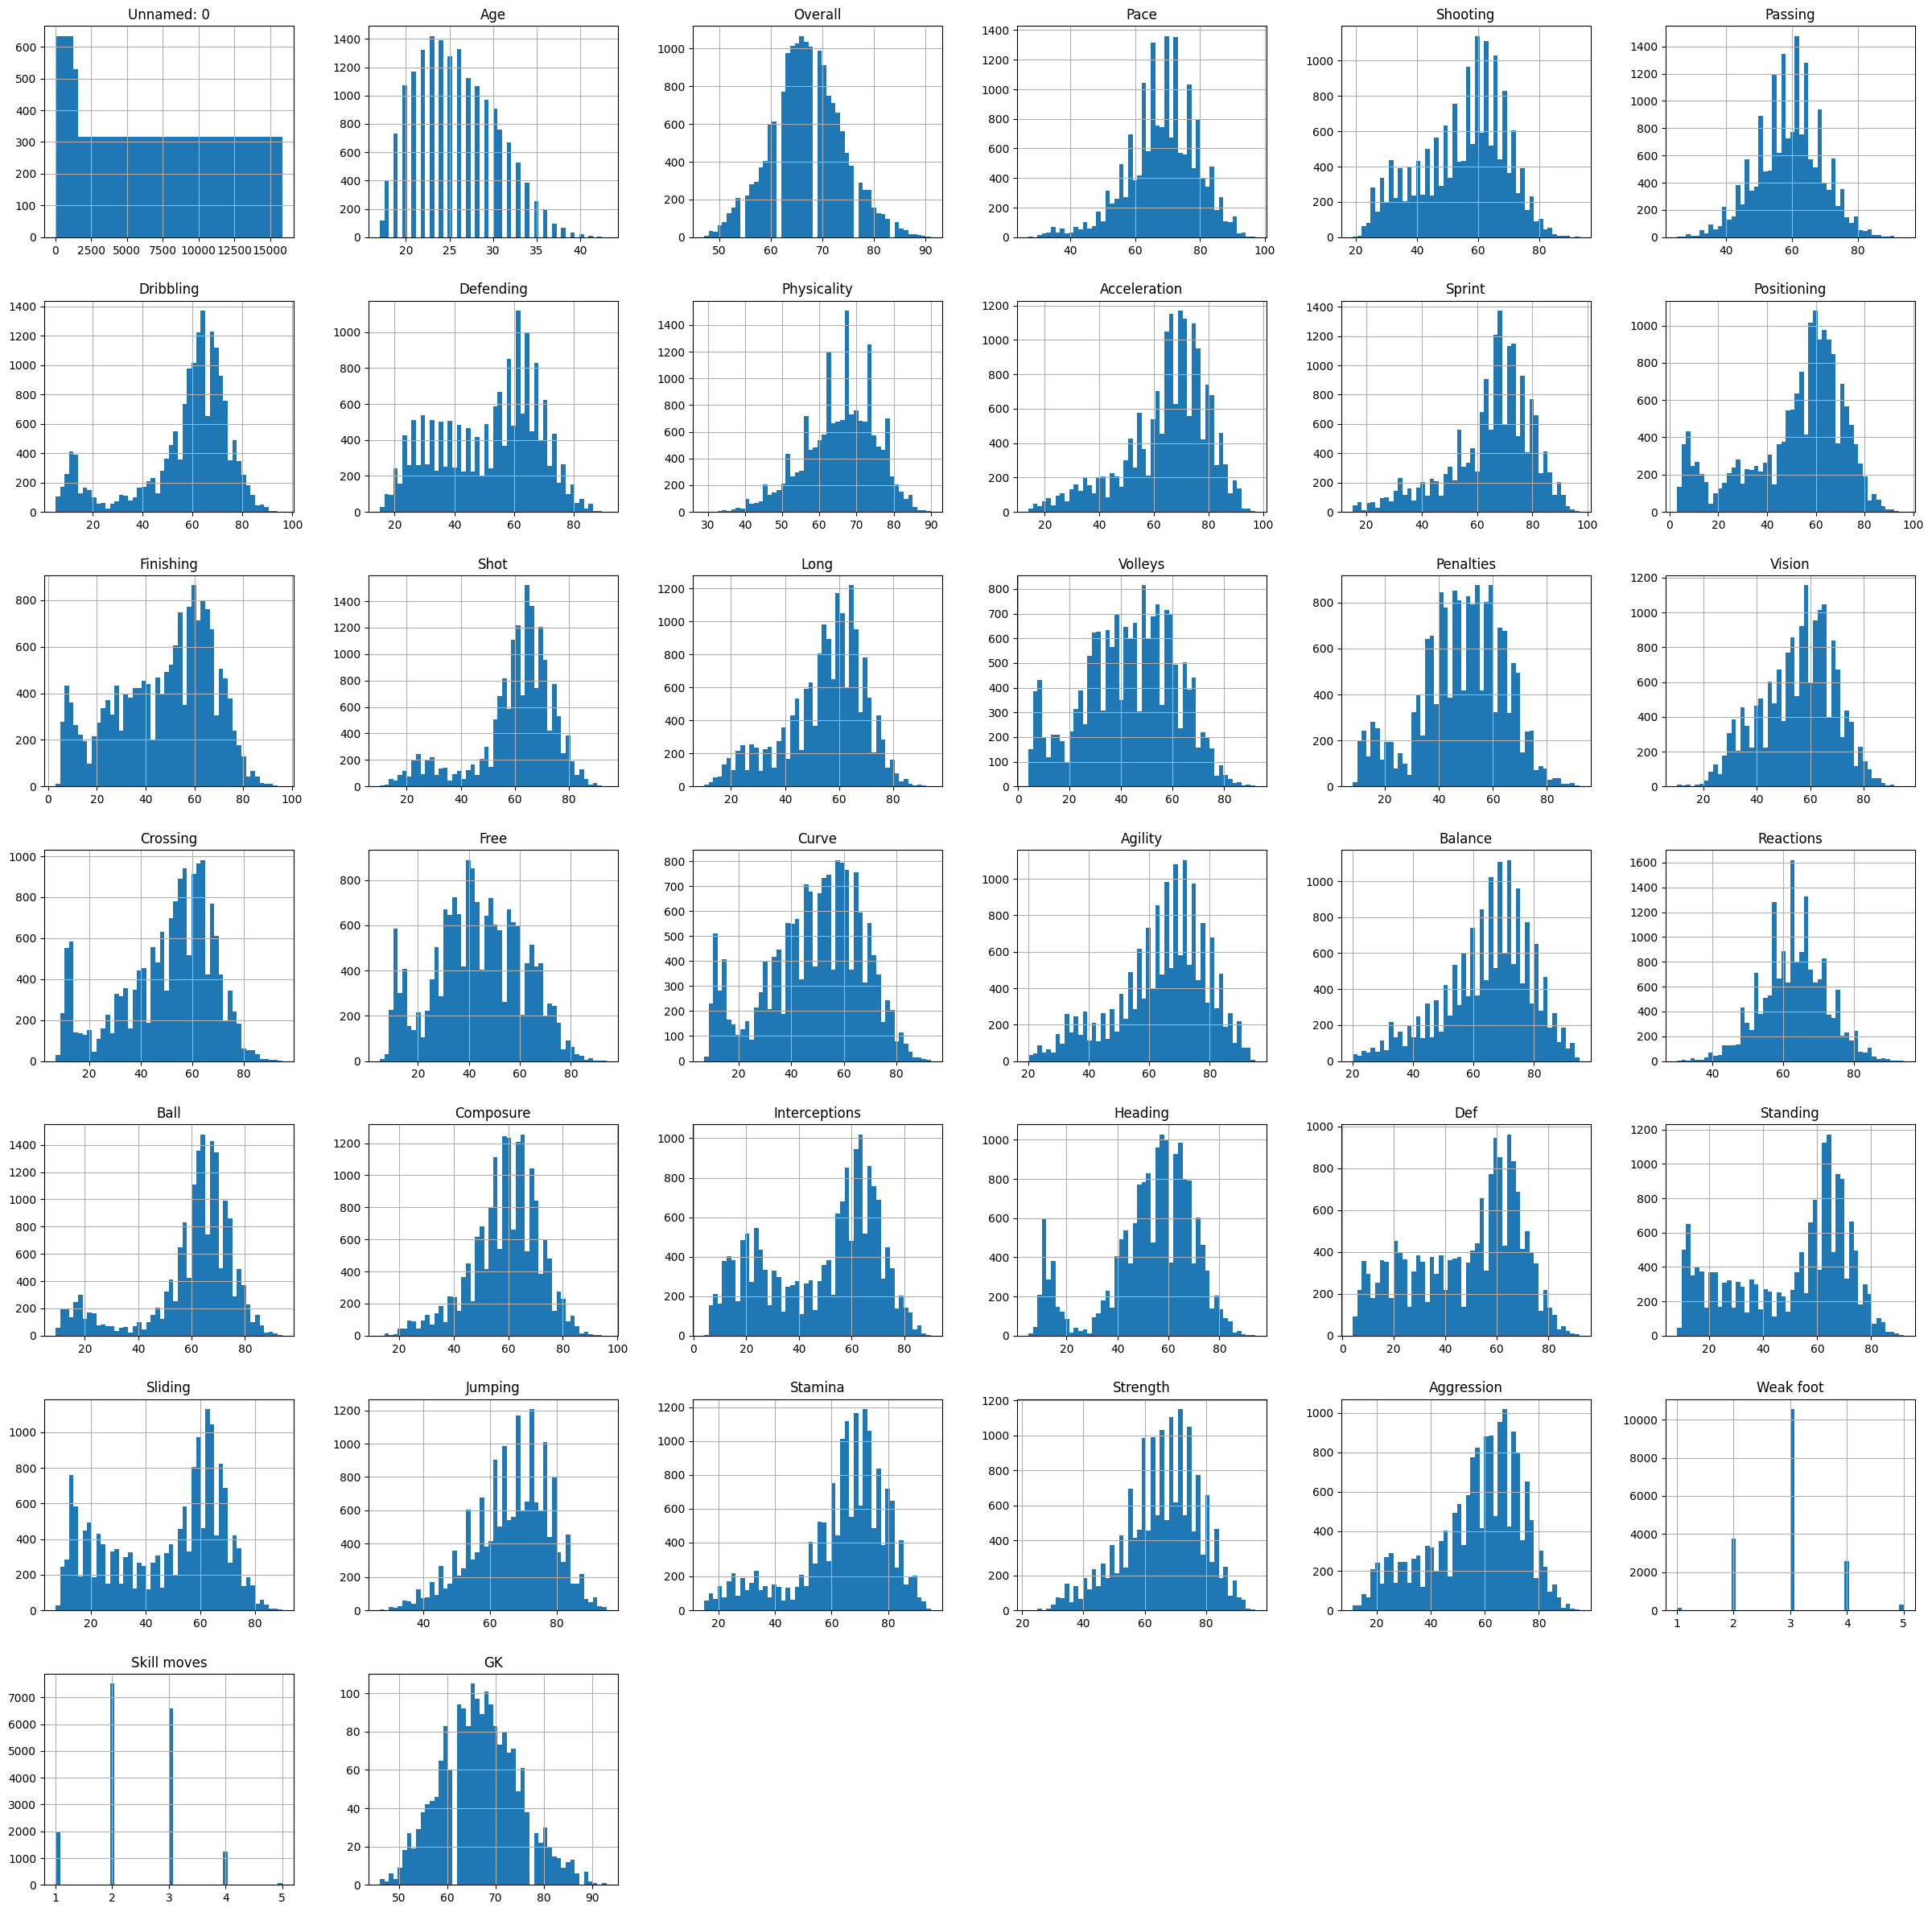

In [18]:
df.hist(bins=50, figsize=(30,30))
plt.show()